In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame, concat
from google.colab import drive
drive.mount('/content/drive')
from datetime import date
import time
from sklearn.model_selection import train_test_split
import os
import math
from math import radians
from sklearn.preprocessing import MinMaxScaler

Mounted at /content/drive


In [2]:
raw_data = pd.read_csv('/content/drive/MyDrive/submissions/submission_nowind1.85457.csv')

In [3]:
dataset = raw_data.copy()

In [4]:
submission = pd.read_csv('/content/drive/MyDrive/Jupyter/unlimited_power/raw_data/sample_submission.csv')

In [5]:
dataset = raw_data.copy()

def columns_IDA(dataset):
  dataset2 = pd.DataFrame()
  for j in range(1,10):
    new_val = []
    for m in range(1, int(raw_data.shape[0]/48)+1):
      temp = dataset.iloc[48*(m-1):48*m,j].values

      strt = 0
      endd = 0
      k = 0

      for i in range(len(temp)):
        if temp[i] > k and k ==0 and i < 24:
          strt = i
        elif temp[i] < k and temp[i] == 0 and i > 24:
          endd = i
        k = temp[i]

      bf = temp[:strt+1]
      y = temp[strt+1:endd-1]
      af = temp[endd-1:]
      # bf = temp[:strt]
      # y = temp[strt:endd]
      # af = temp[endd:]

      x = np.array([i for i in range(len(y))])
      fit_t = np.polyfit(x,y,5)

      for i in x:
        fit1 = fit_t[0]*x**5 + fit_t[1]*x**4 + fit_t[2]*x**3 + fit_t[3]*x**2 + fit_t[4]*x + fit_t[5]
    # fit1 = fit_t[0]*x**4 + fit_t[1]*x**3 + fit_t[2]*x**2 + fit_t[3]*x + fit_t[4]
    # fit1 = fit_t[0]*x**2 + fit_t[1]*x + fit_t[2]

      revised = np.concatenate((bf, fit1, af), axis=0)
      new_val.extend(list(revised))
    k = pd.DataFrame(new_val)
    dataset2 = pd.concat([dataset2, k], axis = 1)
  return dataset2

In [6]:
def not_minus(dataset):
  for i in range(0, len(dataset.index)):
    for j in range(0, len(dataset.columns)):
      K = dataset.iloc[i,j]
      if K < 0.09:
        dataset.iloc[i,j] = 0
  return dataset

In [7]:
submission2 = pd.DataFrame(submission.iloc[:,0])
dataset2 = columns_IDA(dataset)
submission3 = pd.concat([submission2, dataset2], axis = 1)

In [69]:
submission3.columns = list(submission.columns)

In [70]:
submission4 = submission3.set_index('id')

In [71]:
submission4 = submission3.set_index('id')
submission4 = not_minus(submission4)

In [73]:
import numpy as np
from scipy.optimize import curve_fit
import pylab
import math

In [75]:
def f(x, a,b,c, d):
  y = 1/3 * b * x**3 - a*b *x**2 + (a**2*b + c**2)*x + d
  # y = a*(x-12*a) * x **2 + c
  # y = a*x**2 + b
  return y

def rows_IDA(dataset):
  revised = pd.DataFrame()
  for i in range(dataset.shape[0]):
    y = dataset.iloc[i,:].values
    y = np.array(list(y))
    x = np.array([i for i in range(len(y))])

    if list(y).count(0) <= 5 :
      popt, pcov = curve_fit(f, x, y, maxfev = 999990000)
      yfit = f(x, *popt)
      revised = pd.concat([revised, pd.DataFrame(yfit).transpose()], axis = 0)
    else:
      revised = pd.concat([revised, pd.DataFrame(y).transpose()], axis = 0)
    if i % 100 == 0:
      print(i, '/7776')
  return revised

In [ ]:
test = rows_IDA(submission4)
submission5 = not_minus(test)

0


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700


In [ ]:
submission6 = pd.DataFrame(submission5.values, columns = submission4.columns, index = submission4.index)

In [ ]:
submission6

,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
id,,,,,,,,,
0.csv_Day7_0h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.csv_Day7_0h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.csv_Day7_1h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.csv_Day7_1h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.csv_Day7_2h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
submission6.to_csv('revised_6.csv')
!cp revised_6.csv "drive/My Drive/"

In [ ]:
temp

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  2.28,  7.  , 11.39,
       14.84, 17.67, 22.07, 22.88, 23.65, 23.92, 24.99, 27.84, 28.15,
       25.99, 18.93, 15.41, 12.43, 10.6 ,  6.81,  3.58,  1.1 ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ])

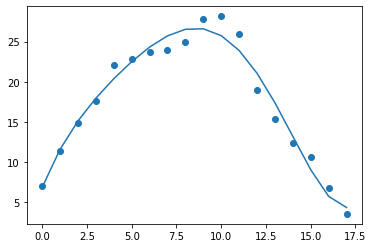

In [ ]:
dataset = raw_data.copy()
dataset2 = pd.DataFrame()

m = 5
j = 1

new_val = []

temp = dataset.iloc[48*(m-1):48*m,j].values

strt = 0
endd = 0
k = 0

for i in range(len(temp)):
  if temp[i] > k and k ==0 and i < 24:
    strt = i
  elif temp[i] < k and temp[i] == 0 and i > 24:
    endd = i
  k = temp[i]

bf = temp[:strt+1]
y = temp[strt+1:endd-1]
af = temp[endd-1:]
# bf = temp[:strt]
# y = temp[strt:endd]
# af = temp[endd:]

x = np.array([i for i in range(len(y))])
fit_t = np.polyfit(x,y,5)

for i in x:
  fit1 = fit_t[0]*x**5 + fit_t[1]*x**4 + fit_t[2]*x**3 + fit_t[3]*x**2 + fit_t[4]*x + fit_t[5]

plt.scatter(x,y)
plt.plot(x,fit1)
plt.show()

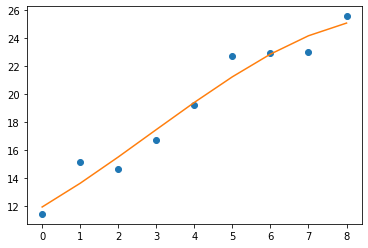

In [ ]:
# yexact =  (1 + math.erf((x-mu)/alpha * math.sqrt(2))) * ya
y = dataset.iloc[18,1:].values
x = np.array([i for i in range(len(y))])

y = np.array(list(y))

def f(x, a,b,c, d):
  y = 1/3 * b * x**3 - a*b *x**2 + (a**2*b + c**2)*x + d
  # y = a*(x-12*a) * x **2 + c
  # y = a*x**2 + b
  return y

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

# Unweighted fit
popt, pcov = curve_fit(f, x, y, maxfev = 999990000)
yfit = f(x, *popt)

pylab.plot(x, y, 'o', label='Noisy data')
pylab.plot(x, yfit, label='Unweighted fit')
pylab.show()